In [22]:
library("TSP")
library("hash")
data("USCA50")
data("USCA312")

concorde_path("~/concorde/TSP")

hash-2.2.6.1 provided by Decision Patterns




found: concorde concorde.c concorde.o 


In [23]:
pointSet <- hash()
noPts <- length(dataTSP)/2
for (i in 1:noPts){
    pointSet[[toString(i)]] <- tuple(dataTSP[i], dataTSP[i+noPts])
}

dist_pts <- function(pt1,pt2){
        return(sqrt((pt1[[1]]-pt2[[1]])^2 + (pt1[[2]]-pt2[[2]])^2))
}

angle <- function(x,y){
  dot.prod <- x%*%y 
  norm.x <- norm(x,type="2")
  norm.y <- norm(y,type="2")
  theta <- acos(dot.prod / (norm.x * norm.y))
  as.numeric(theta)
}

ERROR: Error in eval(expr, envir, enclos): object 'dataTSP' not found


In [14]:
length(USCA312)

[1] 48516

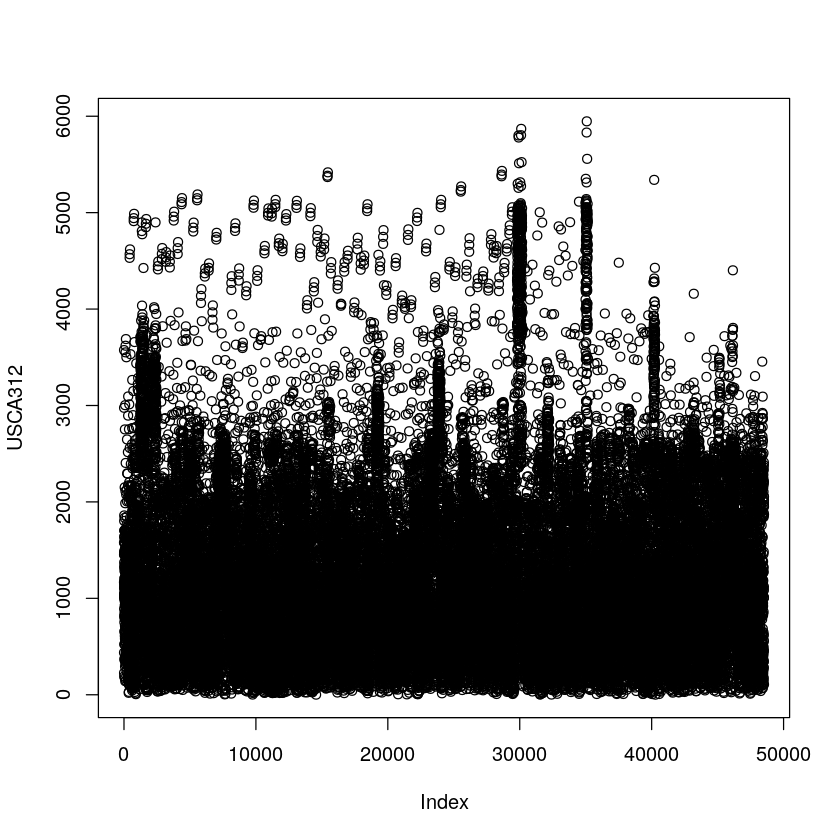

In [15]:
plot(USCA312)

Used control parameters:
clo	 =  
exe	 =  /home/LC/mailo01/concorde/TSP/concorde
precision	 =  6
verbose	 =  TRUE
keep_files	 =  FALSE


object of class ‘TOUR’ 
result of method ‘concorde’ for 312 cities
tour length: 38508

,long,lat,name
,<dbl>,<dbl>,<fct>
1,-99.73000,32.44861,"Abilene, TX"
2,-81.51917,41.08139,"Akron, OH"
3,-73.75667,42.65250,"Albany, NY"
4,-106.65056,35.08444,"Albuquerque, NM"
5,-62.28056,82.51778,"Alert, NT"
6,-75.49056,40.60833,"Allentown, PA"


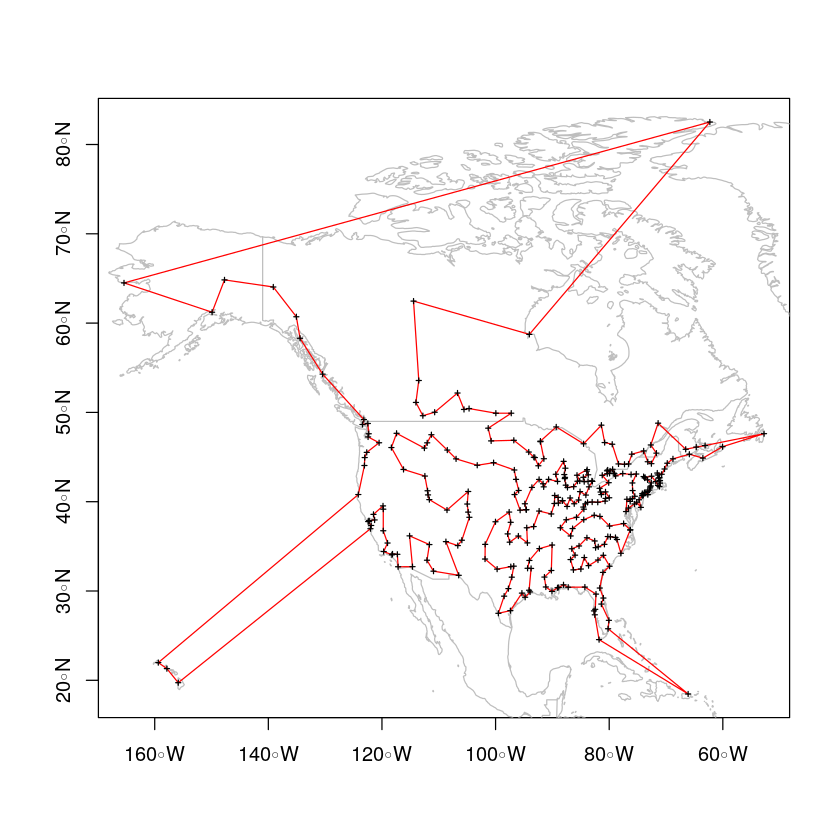

In [12]:
data("USCA312")
## calculate a tour
tour <- solve_TSP(USCA312, method="concorde")
tour
data("USCA312_GPS")
head(USCA312_GPS)
# The following examples requite the suggested package sp, maps, and maptools.

# We run the example only if the packages are installed.
if(require(sp) &&
require(maps) &&
require(maptools)) {
library("sp")
library("maps")
library("maptools")
data("USCA312_GPS")
# create spatial coordinates and a basemap using WGS84 projection.
USCA312_coords <- SpatialPointsDataFrame(cbind(USCA312_GPS$long, USCA312_GPS$lat),
proj4string=CRS("+proj=longlat +datum=WGS84"), data = USCA312_GPS)
USCA312_basemap <- map2SpatialLines(map("world",
xlim=c(-166,-47), ylim=c(15,83),
plot=FALSE), proj4string=CRS("+proj=longlat +datum=WGS84"))
## plot map
plot(as(USCA312_coords, "Spatial"), axes=TRUE)
plot(USCA312_basemap, add=TRUE, col = "gray")
## plot tour and add cities
tour_line <- SpatialLines(list(Lines(list(
Line(USCA312_coords[c(tour, tour[1]),])), ID="1")))
plot(tour_line, add=TRUE, col = "red")
points(USCA312_coords, pch=3, cex=0.4, col="black")
}

object of class ‘TSP’ 
150 cities (distance ‘euclidean’) 

[1] 150

[1]   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
 [19]  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
 [37]  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
 [55]  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
 [73]  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
 [91]  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
[109] 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
[127] 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
[145] 145 146 147 148 149 150

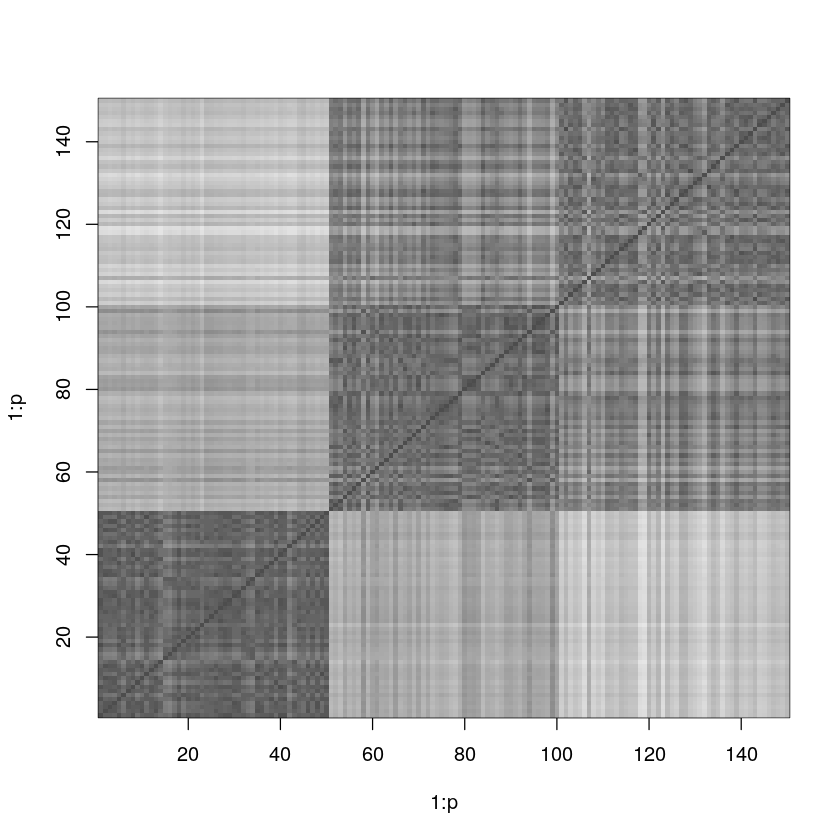

In [17]:
data("iris")
d <- dist(iris[-5])
## create a TSP
tsp <- TSP(d)
tsp
## use some methods
n_of_cities(tsp)
labels(tsp)
image(tsp)

In [20]:
as.dist(USCA50)

                  Abilene, TX Akron, OH Albany, NY Albuquerque, NM Alert, NT
Akron, OH                1167                                               
Albany, NY               1579       413                                     
Albuquerque, NM           437      1422       1832                          
Alert, NT                3575      2895       2766            3437          
Allentown, PA            1453       316        167            1732      2911
Amarillo, TX              226      1172       1585             272      3397
Anchorage, AK            2976      3094       3265            2607      2028
Ann Arbor, MI            1107       140        508            1327      2821
Asheville, NC            1006       382        677            1355      3277
Ashland, KY              1046       189        547            1345      3079
Atlanta, GA               891       530        842            1269      3411
Atlantic City, NJ        1488       392        229            1787      2994